In [1]:
# Ładujemy potrzebne biblioteki
import cv2
import numpy as np
import matplotlib.pyplot as plt
import wave

# Przetwarzanie Grafiki i Muzyki - laboratorium nr 11

## Zadanie 1 (2 punkty)

  * Proszę wygenerować dane w kształcie sinusa.
  * Proszę dodać szum typu pieprz i sól
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.

Proszę narysować wykres sinusa, zaszumionego sinusa i odszumionego sinusa.

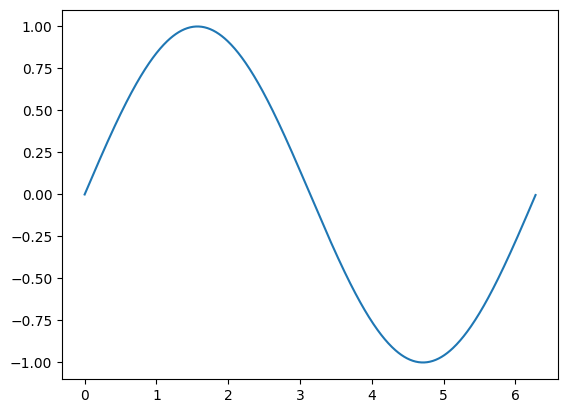

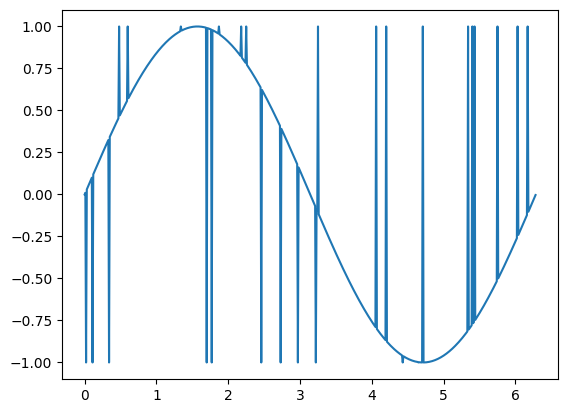

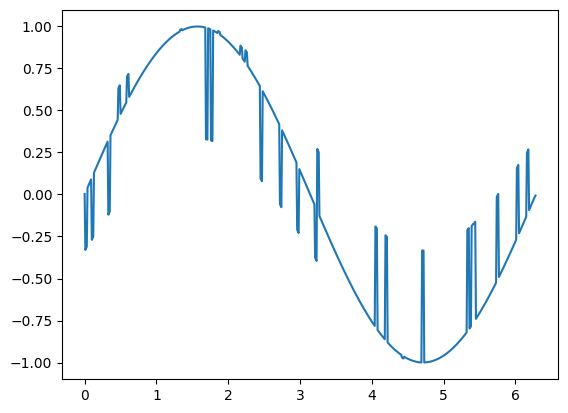

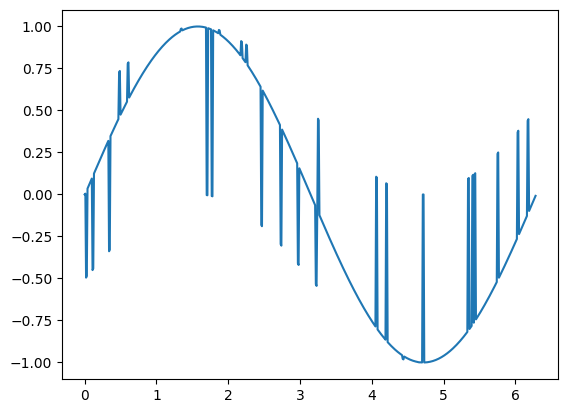

In [3]:
x = np.arange(0, 2*np.pi, 0.01)
sinus = np.sin(x)

sp_noise_percentage = 0.05
sp_mask = np.random.uniform(0, 1, sinus.shape)
sp_max_mask = (sp_mask > (1 - sp_noise_percentage / 2))
sp_min_mask = (sp_mask < sp_noise_percentage / 2)
sp_noise = np.copy(sinus)
sp_noise[sp_max_mask] = sinus.max()
sp_noise[sp_min_mask] = sinus.min()


def moving_average(arr):
    bigger_arr = np.insert(arr, 0, arr.flat[0])
    bigger_arr = np.append(bigger_arr, arr.flat[-1])
    result = np.cumsum(bigger_arr, dtype=float)
    
    result[3:] = result[3:] - result[:-3]
    return result[2:] / 3

def median_filter(arr):
    bigger_arr = np.insert(arr, 0, arr.flat[0])
    bigger_arr = np.append(bigger_arr, arr.flat[-1])
    result = np.zeros_like(arr)
    for i in range(0, bigger_arr.shape[0]-2):
        result[i] = np.median(bigger_arr[i:i+2])
    return result

plt.figure()
plt.plot(x, sinus)
plt.show()
plt.figure()
plt.plot(x, sp_noise)
plt.show()
plt.figure()
plt.plot(x, moving_average(sp_noise))
plt.show()
plt.figure()
plt.plot(x, median_filter(sp_noise))
plt.show()

## Zadanie 2 (1 punkt)

 Proszę wygenerować dane w kształcie sinusa.
  * Proszę dodać szum Gaussowski
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.
  
Proszę narysować wykres sinusa, zaszumionego sinusa i odszumionego sinusa.

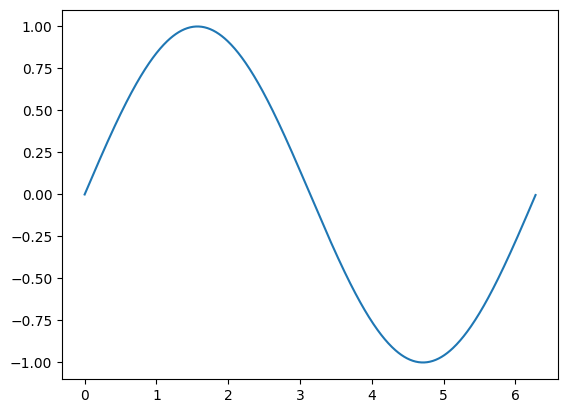

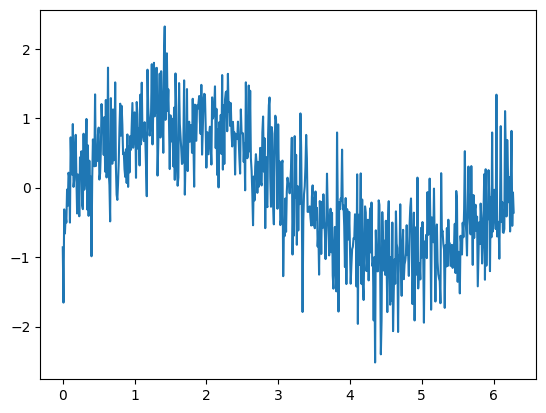

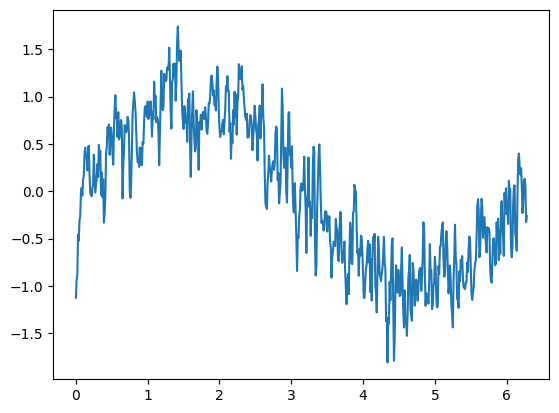

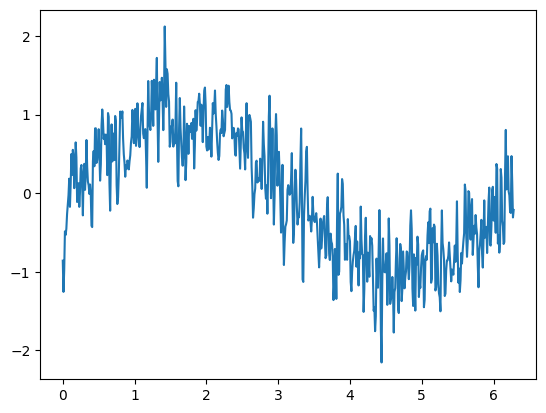

In [5]:
x = np.arange(0, 2*np.pi, 0.01)
sinus = np.sin(x)

gaussian_noise = sinus + np.random.normal(0, 0.5, sinus.shape)

plt.figure()
plt.plot(x, sinus)
plt.show()
plt.figure()
plt.plot(x, gaussian_noise)
plt.show()
plt.figure()
plt.plot(x, moving_average(gaussian_noise))
plt.show()
plt.figure()
plt.plot(x, median_filter(gaussian_noise))
plt.show()

## Zadanie 3 (1 punkt)

Proszę wygenerować dane w kształcie sinusa i zapisać jako plik z rozszerzeniem .wav.

In [68]:
samplerate = 44100

t = np.linspace(0, 1, samplerate)
channel = np.sin(2 * np.pi * t)

audio = np.array([channel]).T
audio = (audio * (2 ** 15 - 1)).astype("<h")

with wave.open('./test.wav', 'w') as file:
    file.setnchannels(1)
    file.setsampwidth(1)
    file.setframerate(samplerate)
    file.writeframes(audio.tobytes())

## Zadanie 4 (1 punkt)

Proszę narysować głos: https://raw.githubusercontent.com/przem85/PGiM/master/img/ja1.wav

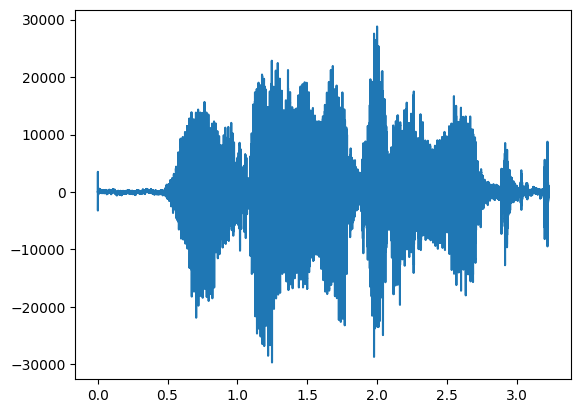

In [23]:
with wave.open('./img/ja1.wav', 'r') as file:
    signal = file.readframes(-1)
    signal = np.frombuffer(signal, np.uint16)
    signal = signal.astype('>h')
    
    fs = file.getframerate()
    t = np.linspace(0, len(signal) / fs, num=len(signal))
    
    plt.plot(t, signal)    

## Zadanie 5 (2 punkty)

  * Proszę wykonać progowanie głosu.
  * Jeżeli wartość mniejsza niż 0 to -400, w odwrotnym przypadku 400.
  * Proszę narysować głos przed progowaniem i po progowaniu.

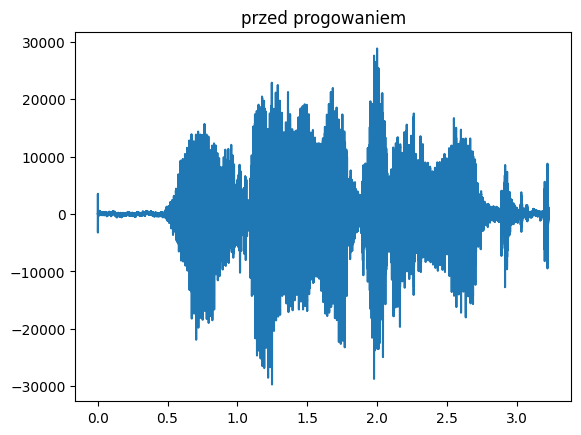

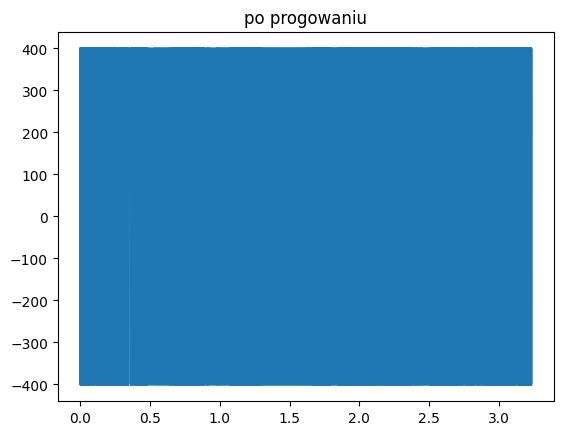

In [33]:
with wave.open('./img/ja1.wav', 'r') as file:
    signal = file.readframes(-1)
    signal = np.frombuffer(signal, np.uint16)
    signal = signal.astype('>h')
    
    fs = file.getframerate()
    t = np.linspace(0, len(signal) / fs, num=len(signal))
    
    plt.figure()
    plt.title('przed progowaniem')
    plt.plot(t, signal)
    
    signal[signal < 0] = -400
    signal[signal >= 0] = 400
    ax = plt.figure()
    plt.title('po progowaniu')
    plt.plot(t, signal)

# Zadanie 6 (3 punkty) 

  * Proszę dodać szum typu pieprz i sól −200,200, Gaussowski N(0,200), jednostajny na odcinku [−200,200]
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.
  * Odpalić dźwięk przed i po filtrowaniu i porównać.

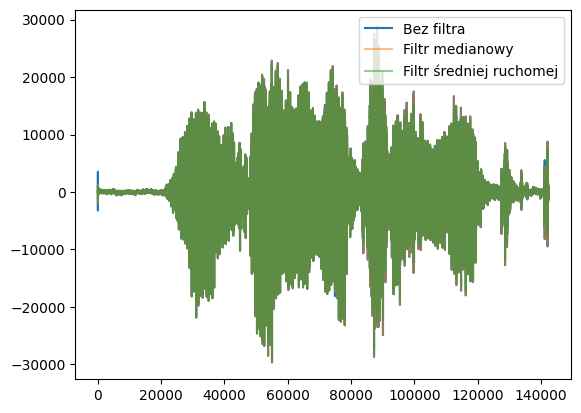

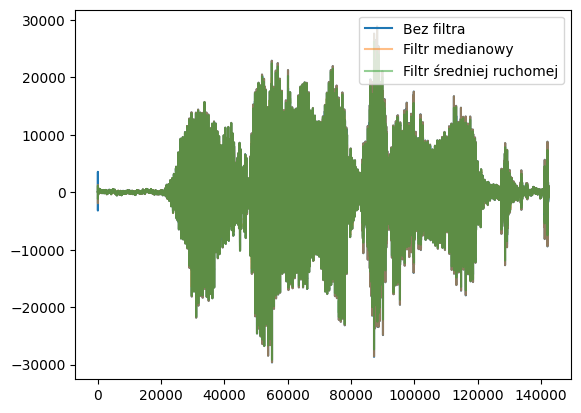

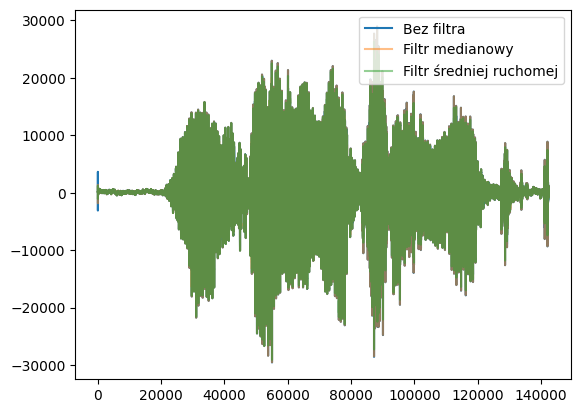

In [11]:
with wave.open('./img/ja1.wav', 'r') as file:
    signal = file.readframes(-1)
    signal = np.frombuffer(signal, np.uint16)
    signal = signal.astype('>h')
    
    fs = file.getframerate()
    sw = file.getsampwidth()
    nf = file.getnframes()
    par = file.getparams()
    
def save_as_wav(data, name):
    audio_to_save = np.array([data]).T
    audio_to_save = audio_to_save.astype("<h")
    with wave.open(f'./{name}.wav', 'w') as file_to_save:
        file_to_save.setnchannels(1)
        file_to_save.setsampwidth(sw)
        file_to_save.setframerate(fs)
        file_to_save.setnframes(nf)
        file_to_save.setparams(par)
        file_to_save.writeframes(audio_to_save.tobytes())

sp_noise_percentage = 0.01
sp_mask = np.random.uniform(0, 1, signal.shape)
sp_max_mask = (sp_mask > (1 - sp_noise_percentage / 2))
sp_min_mask = (sp_mask < sp_noise_percentage / 2)
sp_noise = np.copy(signal)
sp_noise[sp_max_mask] = 200
sp_noise[sp_min_mask] = -200
save_as_wav(sp_noise, 'sp_unfiltered')
save_as_wav(median_filter(sp_noise), 'sp_median')
save_as_wav(moving_average(sp_noise), 'sp_m_average')

uniform_noise = signal + np.random.uniform(-200, 200)
save_as_wav(uniform_noise, 'uni_unfiltered')
save_as_wav(median_filter(uniform_noise), 'uni_median')
save_as_wav(moving_average(uniform_noise), 'uni_m_average')

gauss_noise = signal + np.random.normal(0, 200)
save_as_wav(gauss_noise, 'gauss_unfiltered')
save_as_wav(median_filter(gauss_noise), 'gauss_median')
save_as_wav(moving_average(gauss_noise), 'gauss_m_average')

def load_files_and_plot(file_type):
    with wave.open(f'./{file_type}_unfiltered.wav', 'r') as file1:
        data1 = file1.readframes(-1)
        data1 = np.frombuffer(data1, np.uint16)
        data1 = data1.astype('>h')
        
    with wave.open(f'./{file_type}_median.wav', 'r') as file2:
        data2 = file2.readframes(-1)
        data2 = np.frombuffer(data2, np.uint16)
        data2 = data2.astype('>h')
        
    with wave.open(f'./{file_type}_m_average.wav', 'r') as file3:
        data3 = file3.readframes(-1)
        data3 = np.frombuffer(data3, np.uint16)
        data3 = data3.astype('>h')
        
    plt.plot(data1, label='Bez filtra')
    plt.plot(data2, label='Filtr medianowy')
    plt.plot(data3, label='Filtr średniej ruchomej')
    plt.legend()
    plt.show()
    

load_files_and_plot('sp')
load_files_and_plot('uni')
load_files_and_plot('gauss')